# NYC Payroll Analysis.
---

### Analysis
* 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame
from pylab import *
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator
from scipy import stats
import math
%matplotlib inline
print('Modules are imported.')

Modules are imported.


In [2]:
# Import csv file
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
# File to Load, Source: Kaggle
file_to_load = "Resources/NYC_payroll_data_fiscal_year.csv"

In [3]:
# read csv file
payroll_data = pd.read_csv(file_to_load)
payroll_data.head(3)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2019,67.0,ADMIN FOR CHILDREN'S SVCS,PARRIS,TAMICA,T,2019-04-08T00:00:00.000,BROOKLYN,CHILD AND FAMILY SPECIALIST,ACTIVE,70900.0,per Annum,425.0,14956.98,0.00,0.00,8.25
1,2019,67.0,ADMIN FOR CHILDREN'S SVCS,WOODS,JAHDEIRA,NaN,2015-01-05T00:00:00.000,QUEENS,CHILD PROTECTIVE SPECIALIST,ACTIVE,57070.0,per Annum,1825.0,57402.49,386.75,16478.07,2392.86
2,2019,67.0,ADMIN FOR CHILDREN'S SVCS,NAVAS,JORGE,A,1999-07-06T00:00:00.000,QUEENS,COMMUNITY ASSOCIATE,ACTIVE,46376.0,per Annum,1604.0,40986.29,0.00,0.00,1160.84


In [4]:
payroll_data.shape

(3333096, 17)

In [5]:
# Drop unnecessary data
payroll_data1= payroll_data.drop(["First Name", "Last Name", "Mid Init"], axis="columns")

In [6]:
payroll_data1.head(3)

,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2019,67.0,ADMIN FOR CHILDREN'S SVCS,2019-04-08T00:00:00.000,BROOKLYN,CHILD AND FAMILY SPECIALIST,ACTIVE,70900.0,per Annum,425.0,14956.98,0.00,0.00,8.25
1,2019,67.0,ADMIN FOR CHILDREN'S SVCS,2015-01-05T00:00:00.000,QUEENS,CHILD PROTECTIVE SPECIALIST,ACTIVE,57070.0,per Annum,1825.0,57402.49,386.75,16478.07,2392.86
2,2019,67.0,ADMIN FOR CHILDREN'S SVCS,1999-07-06T00:00:00.000,QUEENS,COMMUNITY ASSOCIATE,ACTIVE,46376.0,per Annum,1604.0,40986.29,0.00,0.00,1160.84


# Data Cleaning 

In [7]:
#The info() function is used to print a concise summary of a DataFrame. 
payroll_data1.count()

Fiscal Year                   3333096
Payroll Number                1587656
Agency Name                   3333096
Agency Start Date             3333096
Work Location Borough         2826873
Title Description             3333018
Leave Status as of June 30    3333096
Base Salary                   3333096
Pay Basis                     3333096
Regular Hours                 3333096
Regular Gross Paid            3333096
OT Hours                      3333096
Total OT Paid                 3333096
Total Other Pay               3333096
dtype: int64

In [8]:
payroll_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333096 entries, 0 to 3333095
Data columns (total 14 columns):
Fiscal Year                   int64
Payroll Number                float64
Agency Name                   object
Agency Start Date             object
Work Location Borough         object
Title Description             object
Leave Status as of June 30    object
Base Salary                   float64
Pay Basis                     object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtypes: float64(7), int64(1), object(6)
memory usage: 356.0+ MB


In [9]:
#Data cleaning (Transform from ELT)
#payroll_data1["Title Description"].value_counts()

In [10]:
payroll_data1.nunique()

Fiscal Year                         6
Payroll Number                    157
Agency Name                       165
Agency Start Date               14609
Work Location Borough              22
Title Description                1761
Leave Status as of June 30          5
Base Salary                     89646
Pay Basis                           4
Regular Hours                   80480
Regular Gross Paid            1607815
OT Hours                        47922
Total OT Paid                  704179
Total Other Pay                656700
dtype: int64

In [11]:
#preparing data to clean convert to string
payroll_data1["Base Salary", "Regular Gross Paid", "Total OT Paid", "Total Other Pay"] = payroll_data1["Base Salary"].astype(str)

In [12]:
# Minor Data Munging to Re-Format the Data Frames
payroll_data1["Base Salary"] = payroll_data1["Base Salary"].astype(str)
payroll_data1["Regular Gross Paid"] = payroll_data1["Regular Gross Paid"].astype(str).str.strip()
payroll_data1["Total OT Paid"] = payroll_data1["Total OT Paid"].astype(str)
payroll_data1["Total Other Pay"] = payroll_data1["Total Other Pay"].astype(str)

In [13]:
# Convert data to Integer and floats.
payroll_data1["Base Salary", "Regular Gross Paid", "Total OT Paid", "Total Other Pay"] = payroll_data1["Base Salary"].str.replace('$','')
payroll_data1["Title Description"] = payroll_data1["Title Description"].astype(str).str.strip()
payroll_data1["Pay Basis"] =  payroll_data1["Pay Basis"].str.strip()


In [14]:
#to clean-up non-alpha numberic characters
payroll_data1["Title Description"]= payroll_data1["Title Description"].str.replace('[^A-Za-z\s]+', '')

In [15]:
#Convert columns back to float and integers
payroll_data1["Base Salary"] = payroll_data1["Base Salary"].astype(float)
payroll_data1["Base Salary"] = payroll_data1["Base Salary"].astype(int)
payroll_data1["Regular Gross Paid"] = payroll_data1["Regular Gross Paid"].astype(float)
payroll_data1["Total OT Paid"] = payroll_data1["Total OT Paid"].astype(float)
payroll_data1["Total Other Pay"] = payroll_data1["Total Other Pay"].astype(float)
payroll_data1.head()
math.floor(1.1111)
payroll_data1.describe()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,3.333096e+06,1.587656e+06,3.333096e+06,3.333096e+06,3.333096e+06,3.333096e+06,3.333096e+06,3.333096e+06
mean,2.016551e+03,5.788932e+02,4.246282e+04,6.689010e+02,4.174712e+04,5.897182e+01,3.267842e+03,2.096560e+03
std,1.704585e+00,2.980527e+02,4.088818e+04,8.858083e+02,3.868996e+04,1.465565e+02,8.877008e+03,5.056832e+03
min,2.014000e+03,2.000000e+00,0.000000e+00,-7.304300e+02,-7.622305e+04,-2.090000e+02,-2.649388e+04,-2.815950e+05
25%,2.015000e+03,3.000000e+02,3.300000e+01,0.000000e+00,3.890400e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.017000e+03,7.420000e+02,4.107900e+04,0.000000e+00,3.587180e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.018000e+03,7.470000e+02,7.648800e+04,1.825000e+03,7.321511e+04,2.000000e+00,1.943825e+02,1.107020e+03
max,2.019000e+03,9.960000e+02,3.527630e+05,4.171430e+03,6.723089e+05,3.347500e+03,2.373897e+05,1.003558e+05


# Analysis and Visualizatons 

In [16]:
payroll_data1["Fiscal Year"].unique() 

array([2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [17]:
annual_pay = payroll_data1[(payroll_data1["Pay Basis"] == "per Annum")]

In [18]:
# Subset of Data,to avoid negative values and zeros. 
x = annual_pay[(annual_pay["Regular Gross Paid"] > 10000) & (annual_pay["Base Salary"] > 10000)]

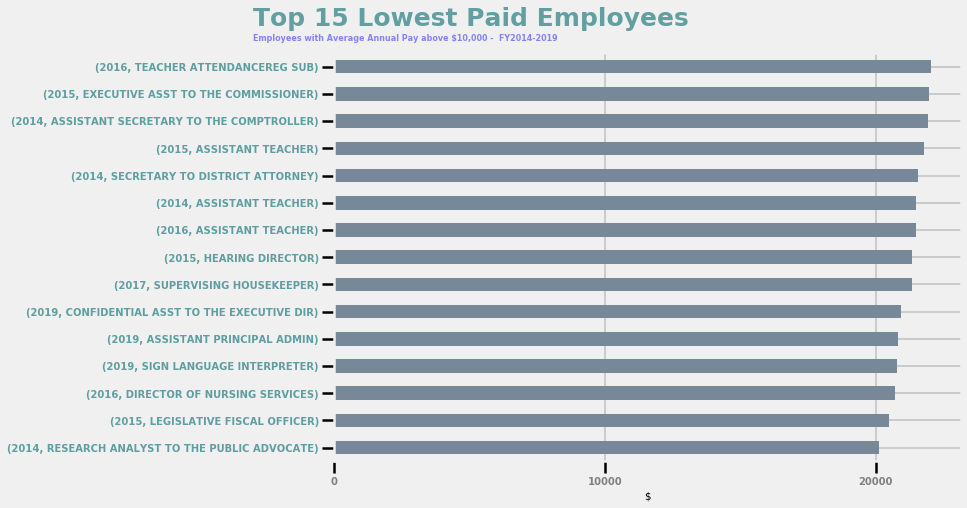

<Figure size 504x504 with 0 Axes>

In [99]:
# Visualization for lowest paid employees
x.groupby(["Fiscal Year","Title Description"])["Regular Gross Paid"].mean().sort_values(ascending=True)[:15].plot(kind='barh',color='lightslategray')
plt.xticks(fontsize=10, color="gray", weight="bold")
plt.yticks(fontsize=10, color="cadetblue",weight="bold")
plt.ylabel('')
plt.xlabel('$',fontsize=10)
plt.rcParams['figure.figsize']= 7,7
plt.text(x=-3000, y=15.5, s="Top 15 Lowest Paid Employees", fontsize=25, weight="bold",color="cadetblue",alpha=.98)
plt.text(x=-3000, y=14.95, s="Employees with Average Annual Pay above $10,000 -  FY2014-2019",fontsize=8, weight="bold",color="blue",alpha=.45)
# Show the Figure
plt.show() 
plt.savefig('output/lowest_Paid_employees.png')

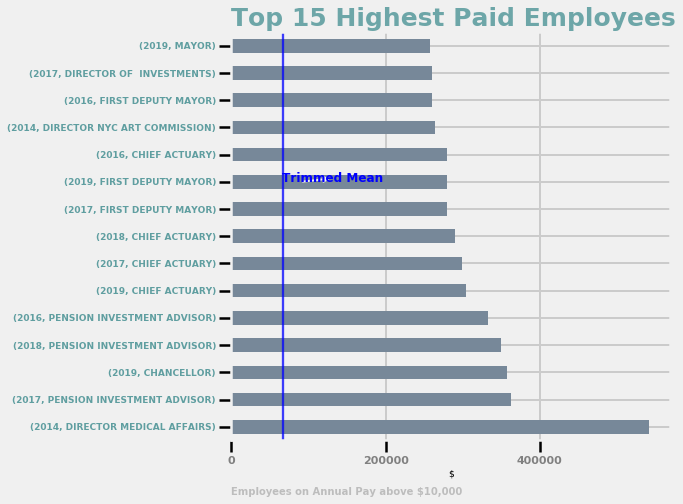

<Figure size 504x504 with 0 Axes>

In [163]:
# Visualization for highest paid employees
x.groupby(["Fiscal Year","Title Description"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:15].plot(kind="barh",color="lightslategray")
# Label the axes
plt.xticks(fontsize=11, weight= "bold",rotation=0, color="gray")
plt.yticks(fontsize=9.0, weight="bold",color="cadetblue")
plt.ylabel('')
plt.xlabel('$',fontsize=9)
plt.rcParams['figure.figsize']= 7,7
plt.title("Top 15 Highest Paid Employees", loc="left",fontsize=25, color="cadetblue", fontweight= "bold", alpha=.90)
plt.text(x=-5, y=-2.5, s="Employees on Annual Pay above $10,000",weight="bold", fontsize=10,color="gray", alpha=.45)
plt.axvline(x=(stats.trim_mean(x["Regular Gross Paid"].values, 0.1)), color="b", linewidth=2.3, alpha=.75)
plt.annotate("Trimmed Mean",fontsize=12, color="b", fontweight= "bold",xy=(90000,9), xytext=(65000,9), arrowprops=dict(arrowstyle='<-',facecolor="red",connectionstyle="arc3"))

# Show the Figure
plt.show() 
plt.savefig('output/highest_Paid_employees.png')

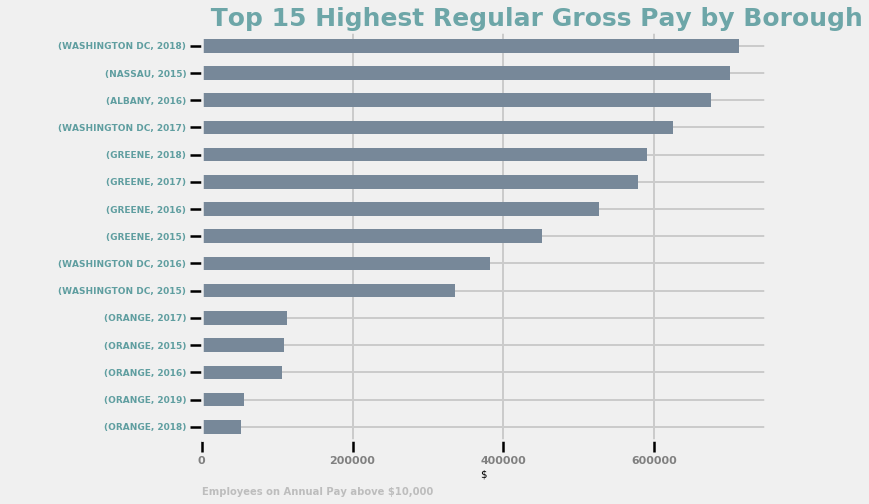

In [121]:
#Graph Gross Pay by work location, top 20
x.groupby(["Work Location Borough", "Fiscal Year"])["Regular Gross Paid"].sum().sort_values(ascending=True)[:15].plot(kind='barh',color='lightslategray')
plt.xlabel('$',fontsize=10)
plt.ylabel(" ")
plt.rcParams['figure.figsize']= 9,7
plt.title(" Top 15 Highest Regular Gross Pay by Borough", loc="left",fontsize=25, color="cadetblue", fontweight= "bold", alpha=.90)

plt.xticks(fontsize=11, weight= "bold",rotation=0, color="gray")
plt.yticks(fontsize=9.0, weight="bold",color="cadetblue")
plt.text(x=-5, y=-2.5, s="Employees on Annual Pay above $10,000",weight="bold", fontsize=10,color="gray", alpha=.45)
plt.savefig('output/Work_Location_Borough.png')

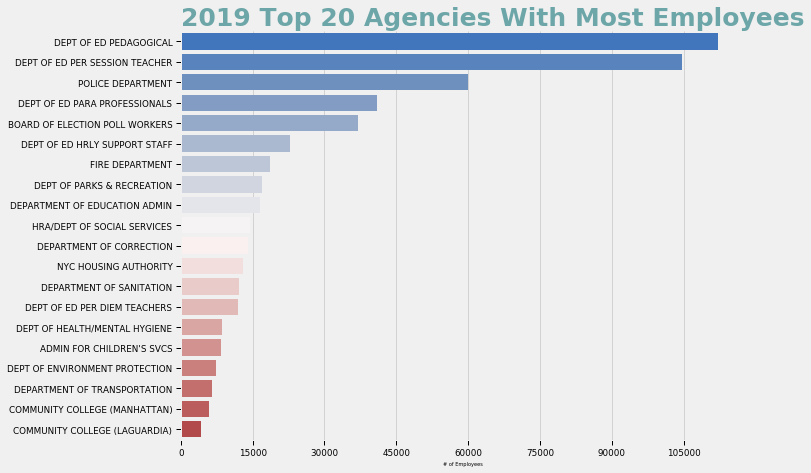

In [44]:
## 2019 Agencies with most employes
x1 = payroll_data1[payroll_data1["Fiscal Year"] == 2019]["Agency Name"].value_counts().sort_values(ascending=False)[0:20].values
y1 = payroll_data1[payroll_data1["Fiscal Year"] == 2019]["Agency Name"].value_counts().sort_values(ascending=False)[0:20].index
plt.rcParams["figure.figsize"]= 9,7
ax1 = sb.barplot(x=x1, y=y1, palette="vlag", saturation=1)
ax1.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
sb.set_context("poster", font_scale=2)
#Remove the top and right spines from plot(s). Figure to despine all axes of, defaults to the current figure.
sb.despine()
ax1.set_title("2019 Top 20 Agencies With Most Employees",loc="left",fontsize=25, color="cadetblue", fontweight= "bold", alpha=.90)
#plt.text(x=-6000, y=25, s="NYC Payroll Analysis", fontsize=10, weight="bold",color="black",alpha=.98)
plt.xlabel('# of Employees',fontsize=5)
plt.savefig('output/2019_Agencies_w_most employes.png')

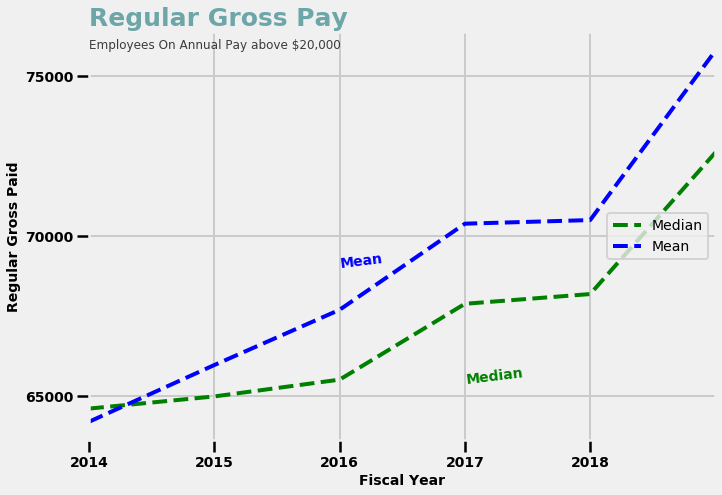

<Figure size 720x504 with 0 Axes>

In [140]:
# For values greater than 20K, calculated mean and median for regular gross pay
x = payroll_data1[(payroll_data1["Pay Basis"] == "per Annum") & (payroll_data1["Regular Gross Paid"] > 20000) & (payroll_data1["Base Salary"] > 20000)]

# Regular Gross Pay Plot
x.groupby(x["Fiscal Year"])["Regular Gross Paid"].median().plot(linewidth=4,linestyle="dashed", c='green', markersize=5)
x.groupby(x["Fiscal Year"])["Regular Gross Paid"].mean().plot(linewidth=4, linestyle="dashed", c='blue', markersize=5)
plt.rcParams["figure.figsize"]= 10,7
plt.xlim(left=2014, right=2019)

#add title and descriptions
plt.title("Regular Gross Pay", loc="left",fontsize=25, color="cadetblue", fontweight= "bold", alpha=.90)


plt.text(x=2014, y=75850, s="Employees On Annual Pay above $20,000",fontsize=12,alpha=.75)

plt.text(x=2017, y=65400, s="Median", color='green', weight='bold', rotation=7, fontsize=14)
plt.text(x=2016, y=69000, s="Mean", color='blue', weight='bold', rotation=7, fontsize=14)
plt.xticks(range(2014,2019,1), fontsize=14, weight= 'bold')
plt.yticks(fontsize=14, weight= 'bold')
plt.ylabel("Regular Gross Paid", fontsize=14, weight= 'bold')
plt.xlabel("Fiscal Year", fontsize=14, weight= 'bold')
plt.grid("True")
plt.legend(["Median", "Mean"],loc="right", fontsize=14, fancybox=True)

# Show the Figure
plt.show()
# Save the Figure
plt.savefig('output/Regular_Gross_Pay_Plot.png')

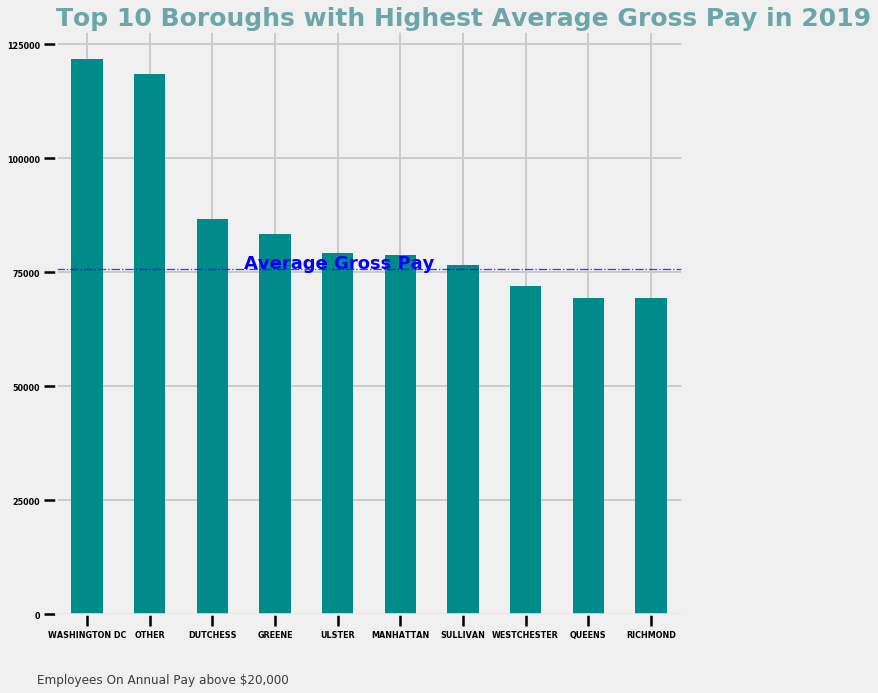

In [186]:
# Top 10 Boroughs with Highest Average Gross Pay FY2019
fy19 = x[x["Fiscal Year"]==2019]
fy19.groupby(["Work Location Borough"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:10].plot(kind='bar',color='darkcyan')
plt.xticks(fontsize=8, weight= 'bold',rotation=0, color='black')
plt.yticks(fontsize=8, weight= 'bold',rotation=0, color='black')
plt.rcParams["figure.figsize"]= 10,10

plt.title("Top 10 Boroughs with Highest Average Gross Pay in 2019", loc="left",fontsize=25, color="cadetblue", fontweight= "bold", alpha=.90)

plt.text(x=-.8, y=-15000, s="Employees On Annual Pay above $20,000",fontsize=12,alpha=.75)
plt.xlabel('')
plt.axhline(y=fy19["Regular Gross Paid"].mean(), color='b', linewidth=1.3,linestyle='dashdot', alpha=.75)
plt.text(x = 2.5, y = (fy19["Regular Gross Paid"].mean() + 240), s="Average Gross Pay", fontsize=18, color="b",weight='bold')
plt.savefig('output/Highest_Average_Gross_2019Plot.png')

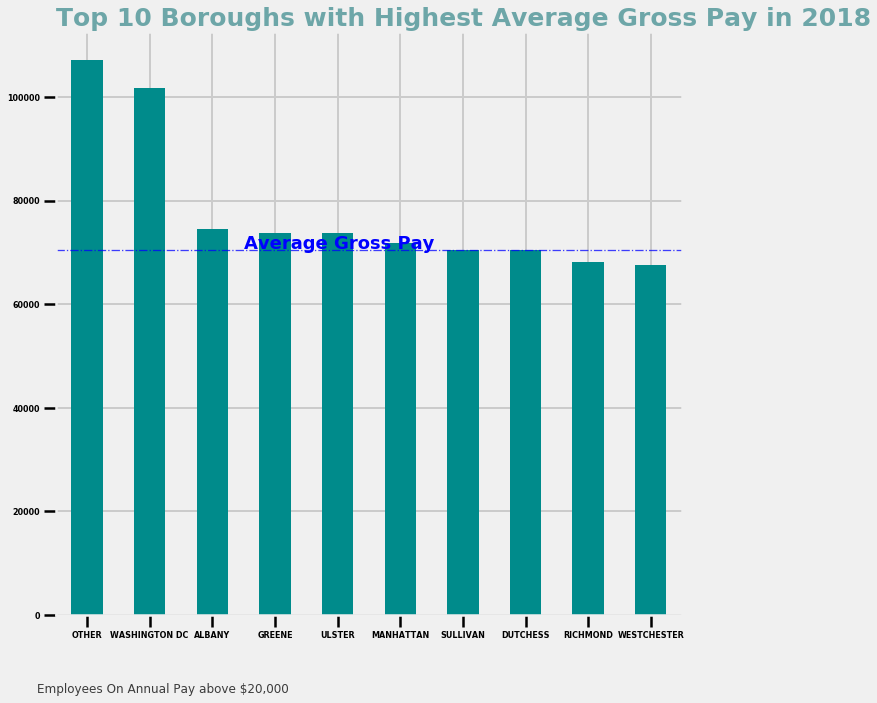

In [189]:
# Top 10 Boroughs with Highest Average Gross Pay FY2018
fy18 = x[x["Fiscal Year"]==2018]
fy18.groupby(["Work Location Borough"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:10].plot(kind='bar',color='darkcyan')
plt.xticks(fontsize=8, weight= 'bold',rotation=0, color='black')
plt.yticks(fontsize=8, weight= 'bold',rotation=0, color='black')
plt.rcParams["figure.figsize"]= 10,10

plt.title("Top 10 Boroughs with Highest Average Gross Pay in 2018", loc="left",fontsize=25, color="cadetblue", fontweight= "bold", alpha=.90)

plt.text(x=-.8, y=-15000, s="Employees On Annual Pay above $20,000",fontsize=12,alpha=.75)
plt.xlabel('')
plt.axhline(y=fy18["Regular Gross Paid"].mean(), color='b', linewidth=1.3,linestyle='dashdot', alpha=.75)
plt.text(x = 2.5, y = (fy18["Regular Gross Paid"].mean() + 240), s="Average Gross Pay", fontsize=18, color="b",weight='bold')
plt.savefig('output/Highest_Average_Gross_2018Plot.png')

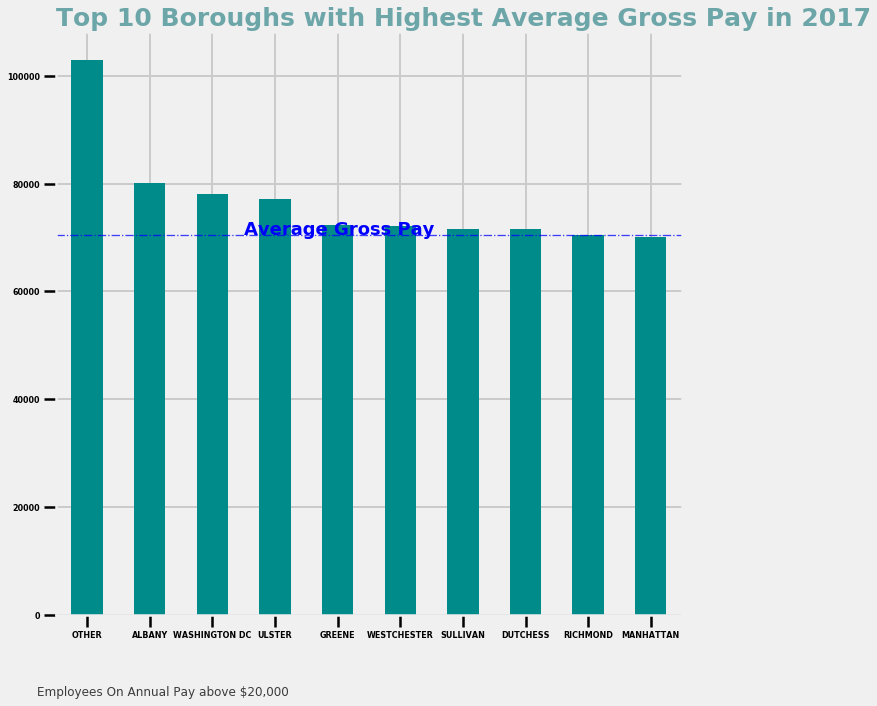

In [190]:
# Top 10 Boroughs with Highest Average Gross Pay FY2017
fy17 = x[x["Fiscal Year"]==2017]
fy17.groupby(["Work Location Borough"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:10].plot(kind='bar',color='darkcyan')
plt.xticks(fontsize=8, weight= 'bold',rotation=0, color='black')
plt.yticks(fontsize=8, weight= 'bold',rotation=0, color='black')
plt.rcParams["figure.figsize"]= 10,10

plt.title("Top 10 Boroughs with Highest Average Gross Pay in 2017", loc="left",fontsize=25, color="cadetblue", fontweight= "bold", alpha=.90)

plt.text(x=-.8, y=-15000, s="Employees On Annual Pay above $20,000",fontsize=12,alpha=.75)
plt.xlabel('')
plt.axhline(y=fy17["Regular Gross Paid"].mean(), color='b', linewidth=1.3,linestyle='dashdot', alpha=.75)
plt.text(x = 2.5, y = (fy17["Regular Gross Paid"].mean() + 240), s="Average Gross Pay", fontsize=18, color="b",weight='bold')

plt.savefig('output/Highest_Average_Gross_2017Plot.png')


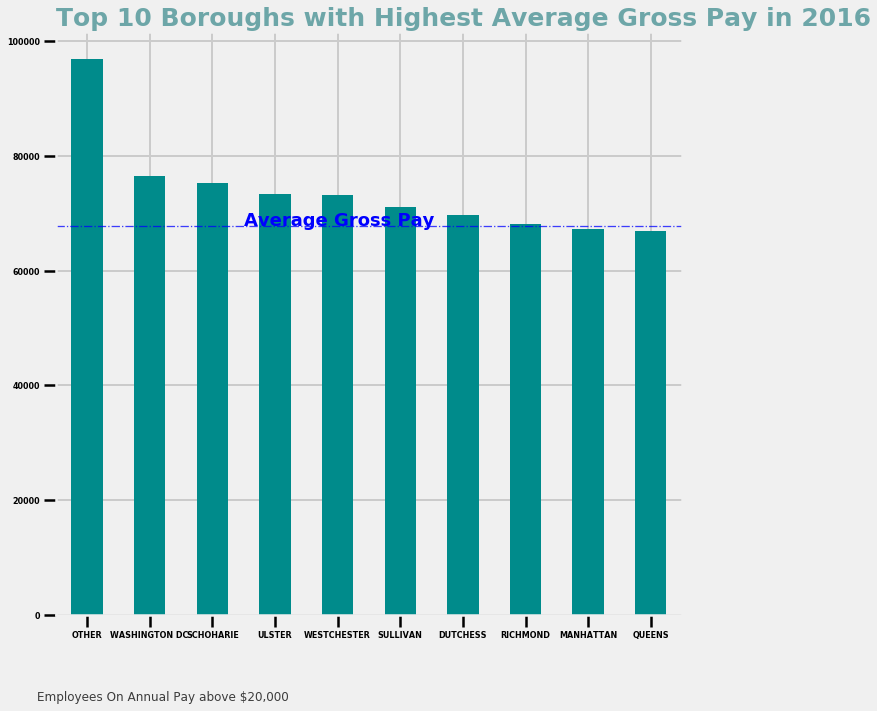

In [192]:
# Top 10 Boroughs with Highest Average Gross Pay FY2016
fy16 = x[x["Fiscal Year"]==2016]
fy16.groupby(["Work Location Borough"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:10].plot(kind='bar',color='darkcyan')
plt.xticks(fontsize=8, weight= 'bold',rotation=0, color='black')
plt.yticks(fontsize=8, weight= 'bold',rotation=0, color='black')
plt.rcParams["figure.figsize"]= 10,10

plt.title("Top 10 Boroughs with Highest Average Gross Pay in 2016", loc="left",fontsize=25, color="cadetblue", fontweight= "bold", alpha=.90)

plt.text(x=-.8, y=-15000, s="Employees On Annual Pay above $20,000",fontsize=12,alpha=.75)
plt.xlabel('')
plt.axhline(y=fy16["Regular Gross Paid"].mean(), color='b', linewidth=1.3,linestyle='dashdot', alpha=.75)
plt.text(x = 2.5, y = (fy16["Regular Gross Paid"].mean() + 240), s="Average Gross Pay", fontsize=18, color="b",weight='bold')

plt.savefig('output/Highest_Average_Gross_2016Plot.png')

Text(100000, 1.3e-05, 'Sub-set of employees with salary above 10000')

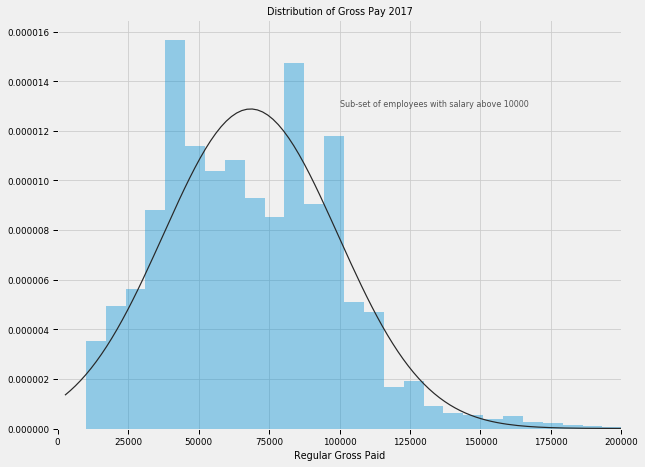

In [29]:
### --- Distributions ---- ###
## creation of subets. For each year.
from scipy.stats import norm
payroll_data2 = payroll_data1[(payroll_data1["Pay Basis"] == "per Annum") & (payroll_data1["Regular Gross Paid"] > 10000) & (payroll_data1["Base Salary"] > 10000)]
cc = payroll_data2[payroll_data2["Fiscal Year"]==2014]
dd = payroll_data2[payroll_data2["Fiscal Year"]==2015]
ee = payroll_data2[payroll_data2["Fiscal Year"]==2016]
ff = payroll_data2[payroll_data2["Fiscal Year"]==2017]
gg = payroll_data2[payroll_data2["Fiscal Year"]==2018]
hh = payroll_data2[payroll_data2["Fiscal Year"]==2019]
# Year 2017 Distribution    (too lazy to add title)
sb.set_context("paper")
sb.distplot(ff["Regular Gross Paid"],fit=norm,kde=False)
#sb.set(xticks=np.arange(0,250000,50000))
plt.xlim(left=0, right=200000)
plt.title('Distribution of Gross Pay 2017')
plt.text(x=100000, y=.000013, s="Sub-set of employees with salary above 10000", fontsize=8,alpha=.65)

Text(100000, 1.7e-05, 'Sub-set of employees with salary above 10000')

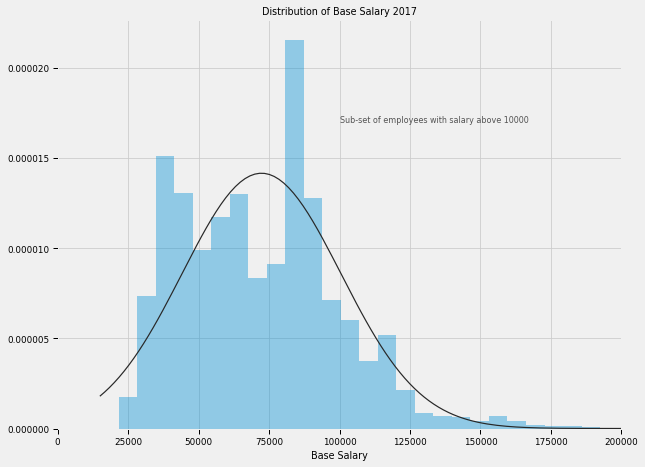

In [30]:
# Year 2017 Distribution    
sb.set_context("paper")
sb.distplot(ff["Base Salary"],fit=norm,kde=False)
#sb.set(xticks=np.arange(0,250000,50000))
plt.xlim(left=0, right=200000)
plt.title('Distribution of Base Salary 2017')
plt.text(x=100000, y=.000017, s="Sub-set of employees with salary above 10000", fontsize=8,alpha=.65)

Text(-5000, -15000, 'Justin Nunez    Source: Kaggle')

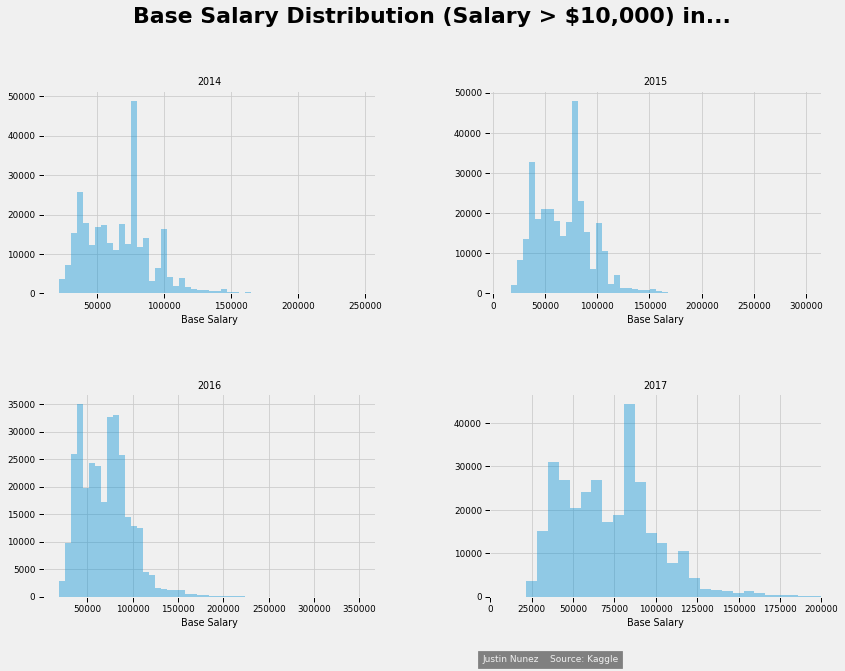

In [31]:
# Distribution of Base Salary for Annual Employees making over 10,000
fig1 = plt.figure(figsize=(12,9))
ax6 = fig1.add_subplot(221)
ax7 = fig1.add_subplot(222)
ax8  = fig1.add_subplot(223)
ax9 = fig1.add_subplot(224)
 # titles 
fig1.suptitle("Base Salary Distribution (Salary > $10,000) in...",fontweight='bold', fontsize=22)
ax6.title.set_text('2014')
ax7.title.set_text('2015')
ax8.title.set_text('2016')
ax9.title.set_text('2017')
sb.distplot(cc["Base Salary"],kde=False, ax=ax6)
sb.distplot(dd["Base Salary"],kde=False, ax=ax7)
sb.distplot(ee["Base Salary"],kde=False, ax=ax8)
sb.distplot(ff["Base Salary"],kde=False, ax=ax9)
plt.subplots_adjust(left=.05, right=.95,hspace=.5, wspace=.35,top=.85)
plt.xlim(left=0, right=200000)
plt.text(x=-5000, y=-15000, s='Justin Nunez    Source: Kaggle', fontsize=9, color='#f0f0f0',backgroundcolor='grey')
# WONT RUN if I take out the "kde=False" paramter in the 4th distplot, so thats why its not on the 2017 graph.

Text(-5000, -15000, 'Justin Nunez    Source: Kaggle')

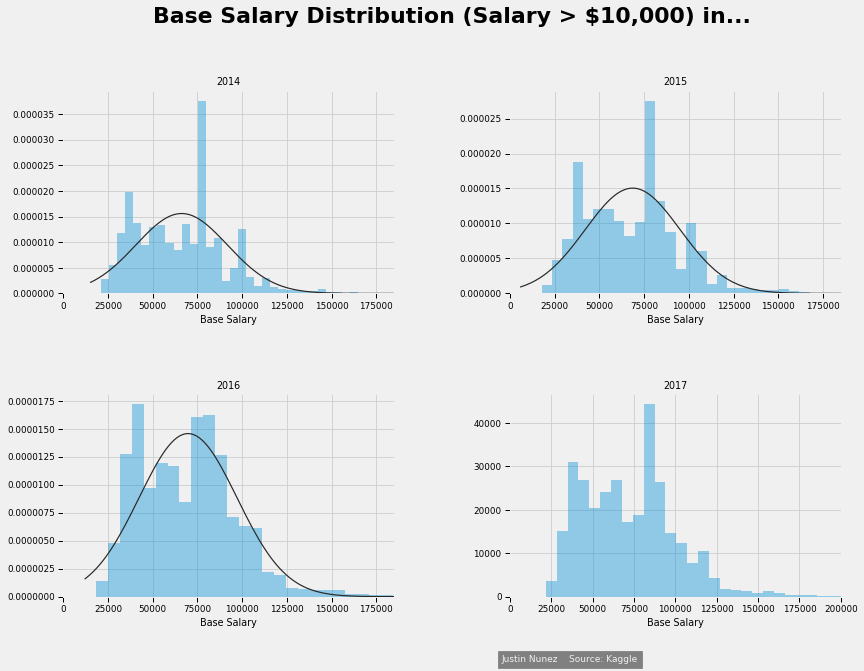

In [32]:
# Distribution of Base Salary for Annual Employees making over 10,000
fig1 = plt.figure(figsize=(12,9))
ax6 = fig1.add_subplot(221)
ax7 = fig1.add_subplot(222)
ax8  = fig1.add_subplot(223)
ax9 = fig1.add_subplot(224)
 # titles 
fig1.suptitle("Base Salary Distribution (Salary > $10,000) in...",fontweight='bold', fontsize=22)
ax6.title.set_text('2014')
ax7.title.set_text('2015')
ax8.title.set_text('2016')
ax9.title.set_text('2017')
sb.distplot(cc["Base Salary"],fit=norm,kde=False, ax=ax6)
ax6.set_xlim(0,185000)
ax7.set_xlim(0,185000)
ax8.set_xlim(0,185000)
ax9.set_xlim(0,185000)
sb.distplot(dd["Base Salary"],fit=norm,kde=False, ax=ax7)
plt.xlim(left=0, right=200000)
sb.distplot(ee["Base Salary"],fit=norm,kde=False, ax=ax8)
plt.xlim(left=0, right=200000)
sb.distplot(ff["Base Salary"], kde=False, ax=ax9)
plt.subplots_adjust(left=.05, right=.95,hspace=.5, wspace=.35,top=.85)
#plt.xlim(left=0, right=175000)
plt.text(x=-5000, y=-15000, s='Justin Nunez    Source: Kaggle', fontsize=9, color='#f0f0f0',backgroundcolor='grey')
# WONT RUN if I take out the "kde=False" paramter in the 4th distplot, so thats why its not on the 2017 graph.

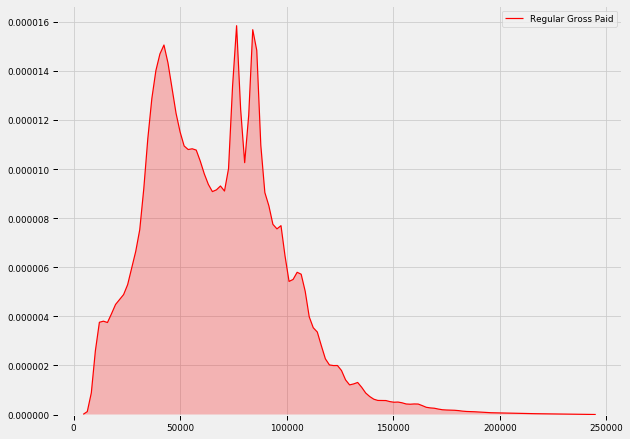

In [33]:
# distribution of Gross Pay in 2014.
sb.kdeplot(payroll_data2["Regular Gross Paid"], shade=True, color="r",clip=(0,240000))
# new.describe() # Shows that 541,544.90 is Max Salary.

(array([4.1850e+03, 3.5620e+03, 3.9060e+03, 7.0220e+03, 5.2220e+03,
        7.2020e+03, 7.9160e+03, 1.1494e+04, 1.7523e+04, 1.7094e+04,
        1.2099e+04, 1.3092e+04, 1.1124e+04, 1.1846e+04, 1.2911e+04,
        1.0994e+04, 1.0721e+04, 9.7630e+03, 1.0682e+04, 8.1430e+03,
        1.2153e+04, 2.0348e+04, 1.0014e+04, 9.9640e+03, 2.1470e+04,
        4.5760e+03, 4.8710e+03, 6.4210e+03, 7.8680e+03, 2.5240e+03,
        1.7440e+03, 1.9130e+03, 2.9950e+03, 1.2510e+03, 1.0610e+03,
        9.2400e+02, 7.6100e+02, 6.1600e+02, 6.0400e+02, 5.9800e+02,
        4.9500e+02, 3.8600e+02, 5.7300e+02, 5.1900e+02, 3.9400e+02,
        2.1700e+02, 2.0300e+02, 2.5800e+02, 1.8100e+02, 1.2000e+02,
        1.4500e+02, 9.6000e+01, 7.5000e+01, 5.4000e+01, 6.8000e+01,
        6.8000e+01, 3.0000e+01, 5.4000e+01, 3.0000e+01, 4.8000e+01,
        2.4000e+01, 8.5000e+01, 2.1000e+01, 3.2000e+01, 0.0000e+00,
        4.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

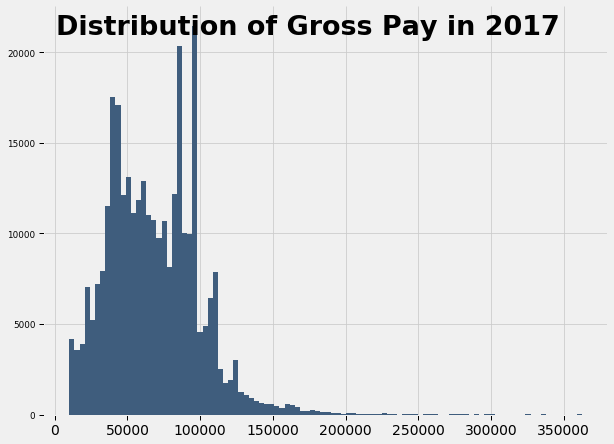

In [34]:
# histogram of 2019 Gross Pay 
ax5 = plt.subplot(111)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
#ax5.get_xaxis().tick_bottom()
#ax5.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.text(x=1000, y= 21000, s="Distribution of Gross Pay in 2017", fontsize=27, fontweight='bold')
plt.hist(list(ff["Regular Gross Paid"].values), color="#3F5D7D", bins=100)